<h3>Regularised regression</h3>
<p>Our original squared loss function in matrix/vector notation is:
$$ L = \frac{1}{N}\sum_{n=1}^N (\mathbf{t} - \mathbf{X}\mathbf{w})^T(\mathbf{t} - \mathbf{X}\mathbf{w}) $$
Here's another loss function:
$$ L = \lambda \mathbf{w}^T\mathbf{w} + \frac{1}{N}\sum_{n=1}^N (\mathbf{t} - \mathbf{X}\mathbf{w})^T(\mathbf{t} - \mathbf{X}\mathbf{w}) $$
Recall that we're minimising this function and so (if $\lambda>0$) this additional term will penalise large positive and negative values in $\mathbf{w}$. $\lambda$ controls how much influence this new term has over the original squared error term.</p>

<p>Differentiating this with respect to $\mathbf{w}$ and then setting to zero (this is a good exercise to do) results in:
$$ (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})\mathbf{w} = \mathbf{X}^T\mathbf{t} $$
where $\mathbf{I}$ is a square matrix with ones on the diagonal and zeros elsewhere (the identity matrix).</p>

<p>To demonstrate the effect of this additional term, we will generate some synthetic data by using a quadratic function and assing some random (normal / Gaussian) noise.</p>

[[ 5.64543502]
 [-7.74585134]
 [ 0.90890286]
 [17.12286943]
 [ 6.98004674]
 [ 5.00890031]
 [26.64205386]
 [37.65810634]
 [57.21421971]
 [79.12520603]]


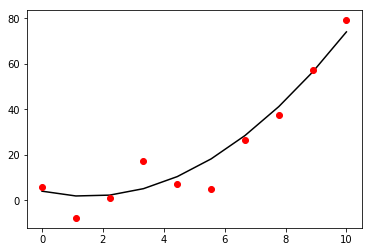

In [1]:
import numpy as np
x = np.linspace(0,10,10)[:,None]
y = x**2 - 3*x + 4
t = y + np.random.normal(0,10,(x.size,1))
print(t)
import pylab as plt
%matplotlib inline
plt.plot(x,y,'k')
plt.plot(x,t,'ro')

<h4>Creating $\mathbf{X}$</h4>

In [6]:
maxorder = 5
x_test = np.linspace(0,10,10)[:,None]
X = np.ones_like(x)
X_test = np.ones_like(x_test)
for i in range(1,maxorder+1):
    X = np.hstack((X,x**i))
    X_test = np.hstack((X_test,x_test**i))

<h4>Loop over different values of $\lambda$</h4>

Training loss with alpha: 4.672586075827135 0
Training loss with alpha: 4.682784676178051 0.01
Training loss with alpha: 4.984132149467356 0.1
Training loss with alpha: 5.6867189757894865 1
Training loss with alpha: 5.947258402068198 10


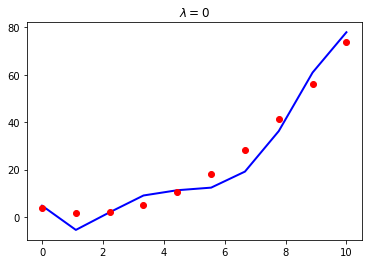

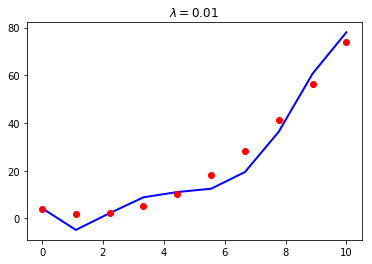

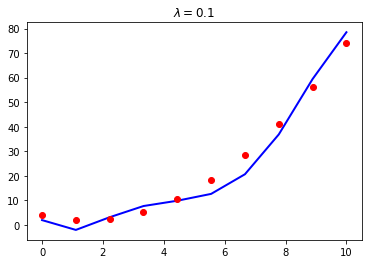

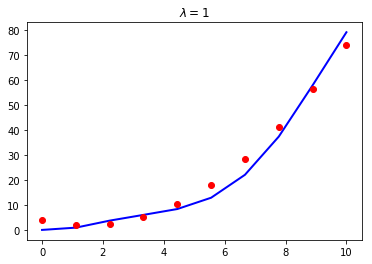

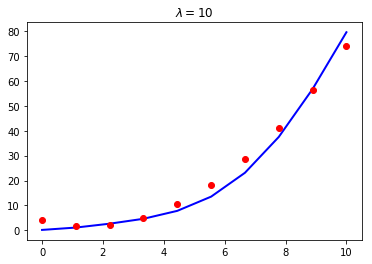

In [7]:
def get_mse(actual, predictions):
    N = actual.shape[0]
    return np.sqrt(np.sum((actual-predictions)**2)/N)

for lamb in [0,0.01,0.1,1,10]:
    w = np.linalg.solve(np.dot(X.T,X) + lamb*np.identity(maxorder+1),np.dot(X.T,t))
    predictions = np.dot(X_test, w)
    
    print("Training loss with alpha:", get_mse(t, predictions), lamb)
    
    plt.figure()
    plt.plot(x_test,predictions,'b-',linewidth=2)
    plt.plot(x,y,'ro')
    title = '$\lambda=$%g'%lamb
    plt.title(title)


<p>As $\lambda$ increases, high values in $\mathbf{w}$ are more heavily penalised which leads to *simpler* functions. Why do lower values correspond to simpler functions?</p>
<p>Firstly, what does *simpler* mean?</p>
<p>I would argue that simpler functions have smaller derivatives (first, second, etc) as they typically change more slowly. In our polynomials, the derivatives are dependent on the values of $\mathbf{w}$. In particular our polynomial is:
$$ t = \sum_{d=0}^D w_d x^d $$
and the first derivative is:
$$ \frac{dt}{dx} = \sum_{d=1}^D dw_d x^{d-1} $$
and second is:
$$ \frac{d^2t}{dx^2} = \sum_{d=2}^D d(d-1)w_d x^{d-2} $$
which in both cases increases with increasing values of $w_d$. So penalising high (positive and negative) values decreases (in general) the gradients (and gradients of gradients, etc).</p> 